# Modelovanje u biologiji


Za rešavanje problema potrebno je koristiti `teoriju diferencijalnih jednačina` i 
analizirati ponašanje sistema populacija u zavisnosti od **parametara** i **početnih uslova**.

Koristicemo model koji se zove ***Competitive Lotka-Volterra model***, koji opisuje interakciju između dve konkurentske vrste.

Predstavljamo ga sledecim sistemom diferencijalnih jednacina:


$ dx/dt = x(r_1 -a_{11} x - a_{12} y)$

$ dy/dt = y(r_2 -a_{21}x - a_{22}y)$

Gde su:


-  x i y populacije prve i druge vrste redom 
- $r_1$ i $r_2$ su stopa rasta populacija bez uticaja konkurencije 
- $a_{11}$ i $a_{22}$ predstavljaju uticaj same populacije na svoj rast 
- $a_{12}$ i $a_{21}$ predstavljaju uticaj populacije druge vrste na rast prvobitne populacije 
- $r_1$ i $r_2$ su stopa rasta populacija bez uticaja konkurencije 

##### Koristicemo proizvoljne pocetne uslove i vrednosti parametara
Pocetni uslovi:
- Početna populacija prve vrste ($x_0$) = 100
- Početna populacija duge vrste ($y_0$) = 80  

Parametri:
- Stopa rasta populacije prve vrste ($r_1$) = 0.1
- Stopa rasta populacije druge vrste ($r_2$) = 0.08
- Uticaj same populacije na svoj rast za prvu vrstu ($a_{11}$) = 0.001
- Uticaj same populacije na svoj rast za drugu vrstu ($a_{22}$) = 0.002
- Uticaj populacije druge vrste na rast prve vrste ($a_{12}$) = 0.001
- Uticaj populacije prve vrste na rast druge vrste ($a_{21}$) = 0.002

Koristicemo biblioteku `scipy` za numericko resavanje sistema diferencijalnih jednacina i biblioteku `matplotlib` za vizuelizaciju rezultata

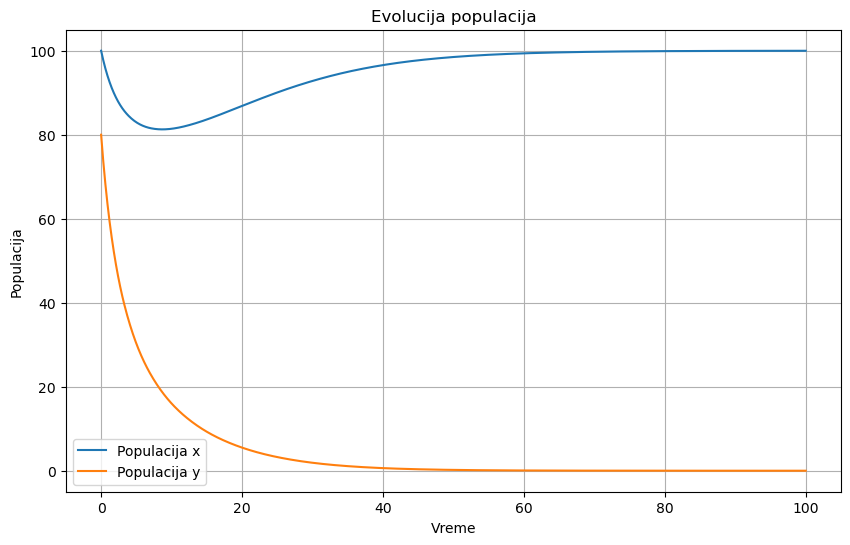

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definisanje funkcije koja predstavlja sistem diferencijalnih jednačina
def competitive_lotka_volterra(t, y, r1, r2, a11, a12, a21, a22):
    x, y = y
    dxdt = x * (r1 - a11*x - a12*y)
    dydt = y * (r2 - a21*x - a22*y)
    return [dxdt, dydt]

# Definisanje početnih uslova i parametara
initial_conditions = [100, 80]  # Pocetna populacija x i y
params = (0.1, 0.08, 0.001, 0.001, 0.002, 0.002)  # r1, r2, a11, a12, a21, a22

# Definisanje vremenskog opsega za simulaciju
t_span = (0, 100)
t_eval = np.linspace(0, 100, 1000)

# Numeričko rešavanje sistema diferencijalnih jednačina
sol = solve_ivp(competitive_lotka_volterra, t_span, initial_conditions, args=params, t_eval=t_eval)

plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Populacija x')
plt.plot(sol.t, sol.y[1], label='Populacija y')
plt.xlabel('Vreme')
plt.ylabel('Populacija')
plt.title('Evolucija populacija')
plt.legend()
plt.grid(True)
plt.show()

Da bismo tacno odredili situacije `koegzistencije`, `izumiranja odredjene vrste` ili `izumiranja vrste u zavisnosti od pocetnog polozaja` potrebno je da analiziramo ponasanje sistema na osnovu ***njegovih stabilnih tacaka(ekvilibrijuma)***, ***nulklinacija*** i ***faznog prostora***

Da bismo izveli zakljucke o koegzistenciji ili izumiranju, trebalo bi prvo da identifikujemo tacke ekvilibrijuma sistema. **Tacke ekvilibrijuma** su tacke u kojima brzine promene populacija postaju nula, odnosno gde se populacije stabilizuju.

Ako su sve tacke ekvilibrijuma stabilne, to bi ukazivalo na koegzistenciju dve vrste. Medjutim, ako je barem jedna tacka ekvilibrijuma nestabilna, to bi moglo ukazivati na izumiranje jedne od vrsta.

**Nulklinacije** su linije u faznom prostoru gde se brzine promene populacija postavljaju na nulu. Presecne tacke nulklinacija mogu biti od posebnog interesa jer nam omogućavaju da identifikujemo kriticne tacke u faznom prostoru.

Da bismo ovo odradili, potrebno je da dodamo identifikaciju tačaka ekvilibrijuma, analizu njihove stabilnosti i nulklinacija. Nakon toga, mozemo zaključiti o koegzistenciji ili izumiranju vrsta u zavisnosti od pocetnih uslova i parametara sistema.


Linije nulklinacija racunamo na sledeci nacin:


1. Nulklinacija za x: $\frac{dx}{dt} = 0$  tj.   x($r_1$ -$a_{11}$x - $a_{12}$y)=0  tj.  y=$r_1$/$a_{12}$ - $a_{11}$/$a_{12}$x
2. Nulklinacija za y: $\frac{dy}{dt} = 0$  tj.   x($r_2$ -$a_{21}$x - $a_{22}$y)=0  tj.  x=$r_2$/$a_{21}$ - $a_{22}$/$a_{21}$x
   

Ove nulklinacije su izracunate u kodu i nacrtane na grafiku kao crvena (za x) i  plava (za y) isprekidana linija. One predstavljaju linije u faznom prostoru gde brzine promene jedne populacije postaju nula

Tačka ekvilibrijuma za x populaciju: (100.0, 40.0)
Stabilnost tačke ekvilibrijuma za x populaciju: Stabilno
Stabilnost tačke ekvilibrijuma za y populaciju: Stabilno


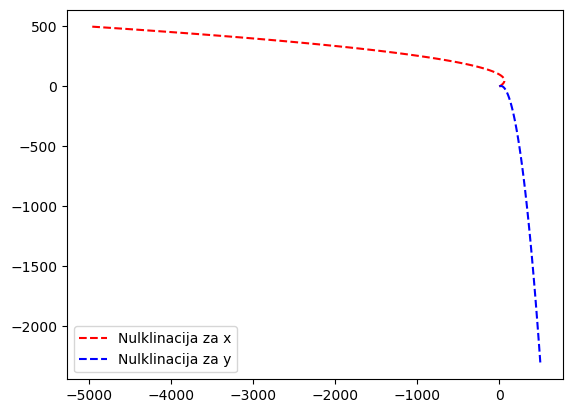

In [2]:
# Analiza tačaka ekvilibrijuma, stabilnosti i nulklinacija
r1, r2, a11, a12, a21, a22 = params
x_eq = r1 / a11
y_eq = r2 / a22
stability_x_eq = 'Stabilno' if (r1 > 0 and r2 > 0 and a11 > 0 and a12 > 0 and x_eq > 0 and y_eq > 0) else 'Nestabilno'
stability_y_eq = 'Stabilno' if (r1 > 0 and r2 > 0 and a21 > 0 and a22 > 0 and x_eq > 0 and y_eq > 0) else 'Nestabilno'

print("Tačka ekvilibrijuma za x populaciju:", (x_eq, y_eq))
print("Stabilnost tačke ekvilibrijuma za x populaciju:", stability_x_eq)
print("Stabilnost tačke ekvilibrijuma za y populaciju:", stability_y_eq)

# Nacrtaj nulklinacije
x_nullcline = np.linspace(0, 500, 100)
y_nullcline = np.linspace(0, 500, 100)
x_nullcline = x_nullcline * (r1 - a11 * x_nullcline - a12 * 0) / (a12 * y_eq)
y_nullcline = y_nullcline * (r2 - a22 * y_nullcline - a21 * 0) / (a21 * x_eq)

plt.plot(x_nullcline, np.linspace(0, 500, 100), label='Nulklinacija za x', linestyle='dashed', color='red')
plt.plot(np.linspace(0, 500, 100), y_nullcline, label='Nulklinacija za y', linestyle='dashed', color='blue')
plt.legend()

plt.show()

Sada cemo da dodamo korak koji izracunava `presecne tacke nulklinacija` i prikazuje ih na grafiku kao crnu tacku


Tačka preseka nulklinacija: (2.0, 4.0)


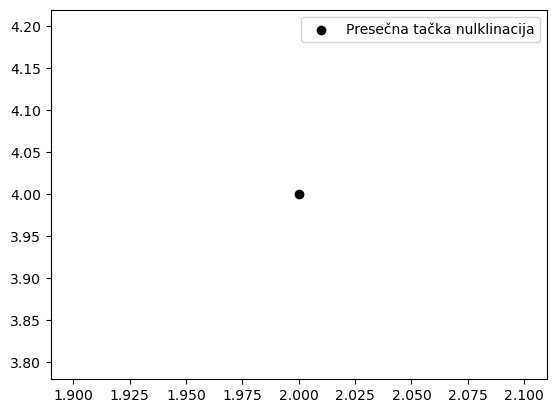

In [3]:
# Izračunavanje tačaka preseka nulklinacija
params = (0.1, 0.08, 0.01, 0.02, 0.02, 0.01)  # r1, r2, a11, a12, a21, a22
r1, r2, a11, a12, a21, a22 = params
x_nullcline_intersect = (r1 * a22 - r2 * a12) / (a11 * a22 - a12 * a21)
y_nullcline_intersect = (r2 * a11 - r1 * a21) / (a11 * a22 - a12 * a21)

print("Tačka preseka nulklinacija:", (x_nullcline_intersect, y_nullcline_intersect))

# Prikaz tačaka preseka na grafiku
plt.scatter(x_nullcline_intersect, y_nullcline_intersect, color='black', label='Presečna tačka nulklinacija')

plt.legend()
plt.show()

**Fazni portret** je grafik koji prikazuje ponasanje sistema u faznom prostoru, obicno prikazujuci promene u populacijama kao funkciju jedna od druge sto je do sada u programu i prikazano.


Grafik prikazuje evoluciju populacija x i y a obe populacije su nenegativne jer populacije ne mogu biti negativne u stvarnosti

Fazni portret nam pomaze da vizualizujemo kako se populacije menjaju tokom vremena i kako interakcije izmedju njih uticu na ponasanje sistema

Nulklinacije su prikazane kao isprekidane linije, dok su tacke ekvilibrijuma oznacene na grafiku.

#### Koji slucaj je u pitanju?

Moze biti koegzistencija, izumiranje određene vrste ili izumiranje vrste zavisno od početnog položaja

Provericemo da li su obe tacke ekvilibrijuma stabilne, sto bi ukazivalo na koegzistenciju, ili da li je jedna od tacaka nestabilna, sto bi ukazivalo na mogucnost izumiranja odredjene vrste.

Tačka ekvilibrijuma za x populaciju: (10.0, 8.0)
Stabilnost tačke ekvilibrijuma za x populaciju: Stabilno
Stabilnost tačke ekvilibrijuma za y populaciju: Stabilno
Tačka preseka nulklinacija: (2.0, 4.0)
Situacija: Koegzistencija dve vrste


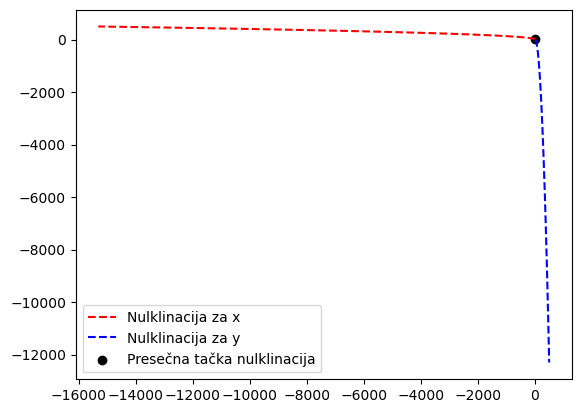

In [4]:
# Analiza tačaka ekvilibrijuma, stabilnosti i nulklinacija
r1, r2, a11, a12, a21, a22 = params
x_eq = r1 / a11
y_eq = r2 / a22
stability_x_eq = 'Stabilno' if (r1 > 0 and r2 > 0 and a11 > 0 and a12 > 0 and x_eq > 0 and y_eq > 0) else 'Nestabilno'
stability_y_eq = 'Stabilno' if (r1 > 0 and r2 > 0 and a21 > 0 and a22 > 0 and x_eq > 0 and y_eq > 0) else 'Nestabilno'

print("Tačka ekvilibrijuma za x populaciju:", (x_eq, y_eq))
print("Stabilnost tačke ekvilibrijuma za x populaciju:", stability_x_eq)
print("Stabilnost tačke ekvilibrijuma za y populaciju:", stability_y_eq)

# Izračunavanje tačaka preseka nulklinacija
x_nullcline_intersect = (r1 * a22 - r2 * a12) / (a11 * a22 - a12 * a21)
y_nullcline_intersect = (r2 * a11 - r1 * a21) / (a11 * a22 - a12 * a21)

print("Tačka preseka nulklinacija:", (x_nullcline_intersect, y_nullcline_intersect))

# Nacrtaj nulklinacije
x_nullcline = np.linspace(0, 500, 100)
y_nullcline = np.linspace(0, 500, 100)
x_nullcline = x_nullcline * (r1 - a11 * x_nullcline - a12 * 0) / (a12 * y_eq)
y_nullcline = y_nullcline * (r2 - a22 * y_nullcline - a21 * 0) / (a21 * x_eq)

plt.plot(x_nullcline, np.linspace(0, 500, 100), label='Nulklinacija za x', linestyle='dashed', color='red')
plt.plot(np.linspace(0, 500, 100), y_nullcline, label='Nulklinacija za y', linestyle='dashed', color='blue')
plt.scatter(x_nullcline_intersect, y_nullcline_intersect, color='black', label='Presečna tačka nulklinacija')
plt.legend()

# Analiza situacije
if stability_x_eq == 'Stabilno' and stability_y_eq == 'Stabilno':
    print("Situacija: Koegzistencija dve vrste")
elif stability_x_eq == 'Nestabilno' and stability_y_eq == 'Nestabilno':
    print("Situacija: Izumiranje obe vrste")
else:
    print("Situacija: Izumiranje određene vrste ili izumiranje vrste zavisno od početnog položaja")

plt.show()

### Zakljucak

U nasem projektu smo obuhvatili i obradili sledece stvari:

- Numericko resavanje sistema diferencijalnih jednacina
- Vizuelizacija evolucije populacija x i y tokom vremena
- Izracunavanje tacaka ekvilibrijuma, njihove stabilnosti i nulklinacija
- Skiciranje nulklinacija, tacaka ekvilibrijuma i presecnih tacaka nulklinacija u grafiku
- Analiza situacije na osnovu stabilnosti tacaka ekvilibrijuma